In [2]:
import matplotlib.pyplot as plt

In [3]:
import requests


In [4]:
from bs4 import BeautifulSoup as bs

In [5]:
url = "http://www.ipeen.com.tw/search/taipei/000/0-100-0-0/"

In [6]:
countries = ["美國", "法國",   "緬甸",  "越南", "菲律賓",     "印度", "巴拿馬", "泰國",   "日本",  "韓國",  "德國"]

In [10]:
def crawlDataForCountry(country):
    resp = requests.get(url+country)
    if resp.status_code == 200:
        return resp.text
    else:
        return "something went wrong"

In [24]:

a = crawlDataForCountry("日本")

In [25]:
soup = bs(a,"html5lib")

In [16]:
soup

<!DOCTYPE html>
<html lang="zh-tw" xmlns:fb="http://www.facebook.com/2008/fbml"><head>
<meta charset="utf-8"/>
<title>日本 － iPeen 愛評網</title>

<meta content="zh-Hant-TW" http-equiv="content-language"/>
<meta content="IE=10; IE=9; IE=8; IE=7" http-equiv="X-UA-Compatible"/>
<meta content="iPeen愛評網嚴選日本好評商家。透過網友們的分享與評比讓您找到CP值高的日本。" name="description"/>
<meta content="日本" name="keywords"/>
<meta content="app-id=366479443" name="apple-itunes-app"/>
<meta content="180154523139" property="fb:pages"/>

<!--[if lt IE 9]>
	<script src="/js/html5shiv.js"></script>
<![endif]-->


		<link href="http://www.ipeen.com.tw/search/taipei/000/0-100-0-0/日本" rel="canonical"/>
		<link href="http://www.ipeen.com.tw/search/taipei/000/0-100-0-0/日本?p=2" rel="next"/>
	

	<link href="http://www.ipeen.com.tw/touch/search.php?kw=日本" media="only screen and (max-width: 640px)" rel="alternate"/>
	<link href="http://www.ipeen.com.tw/touch/search.php?kw=日本" media="handheld" rel="alternate"/>


<link href="http://www.ipeen.

In [23]:
soup.findAll("a",attrs = {"category":"dis"})

[<a category="dis" class="a_search_location addrAdd ga_tracking" data-action="filter_area" data-category="search" data-label="台北車站" href="" index="6" level="0">台北車站(26)</a>,
 <a category="dis" class="a_search_location addrAdd ga_tracking" data-action="filter_area" data-category="search" data-label="士林夜市" href="" index="13" level="0">士林夜市(6)</a>,
 <a category="dis" class="a_search_location addrAdd ga_tracking" data-action="filter_area" data-category="search" data-label="西門町" href="" index="11" level="0">西門町(20)</a>,
 <a category="dis" class="a_search_location addrAdd ga_tracking" data-action="filter_area" data-category="search" data-label="永康商圈" href="" index="17" level="0">永康商圈(10)</a>,
 <a category="dis" class="a_search_location addrAdd ga_tracking" data-action="filter_area" data-category="search" data-label="東區" href="" index="15" level="0">東區(84)</a>,
 <a category="dis" class="a_search_location addrAdd ga_tracking" data-action="filter_area" data-category="search" data-label="華西街" hr

In [31]:
def extractdata(rawtext):
    soup = bs(rawtext,'html5lib')
    tags = soup.findAll("a",attrs = {"category":"dis"})
    d = {}
    for tag in tags:
        a = tag.text[:-1].rsplit('(')
        if len(a) == 2:
            d[a[0]] = a[1]
    return d

In [35]:
datadict = {}
for country in countries:
    b = crawlDataForCountry(country)
    datadict[country]=extractdata(b)

In [36]:
datadict

{'印度': {'中山北路': '3',
  '五分埔商圈': '1',
  '信義商圈': '8',
  '公館商圈': '3',
  '台北車站': '5',
  '士林夜市': '6',
  '大龍峒商圈': '1',
  '天母商圈': '5',
  '寧夏夜市': '1',
  '師大商圈': '13',
  '後火車站': '4',
  '捷運中山站商圈': '3',
  '景美夜市': '1',
  '東區': '14',
  '永康商圈': '6',
  '艋舺商圈': '1',
  '華西街': '1',
  '西門町': '4',
  '迪化街': '1',
  '遼寧街夜市': '8',
  '饒河夜市': '1'},
 '巴拿馬': {'捷運中山站商圈': '1'},
 '德國': {'中山北路': '7',
  '五分埔商圈': '3',
  '信義商圈': '13',
  '內湖737夜市': '4',
  '公館商圈': '6',
  '北投商圈': '2',
  '南機場': '1',
  '台北車站': '6',
  '士林夜市': '3',
  '大龍峒商圈': '1',
  '天母商圈': '8',
  '寧夏夜市': '1',
  '師大商圈': '15',
  '後火車站': '2',
  '捷運中山站商圈': '9',
  '文化大學': '1',
  '景美夜市': '2',
  '東區': '26',
  '永康商圈': '5',
  '西門町': '4',
  '貓空商圈': '1',
  '迪化街': '1',
  '遼寧街夜市': '11',
  '陽明山': '1',
  '雙城街夜市': '4',
  '饒河夜市': '1'},
 '日本': {'中山北路': '18',
  '信義商圈': '39',
  '內湖737夜市': '6',
  '公館商圈': '6',
  '北投商圈': '3',
  '南機場': '4',
  '台北車站': '26',
  '士林夜市': '6',
  '大龍峒商圈': '6',
  '天母商圈': '12',
  '寧夏夜市': '1',
  '師大商圈': '8',
  '延三夜市': '1',
  '後火車站': '6',
  '捷運中山站商圈': '46',
  

In [42]:
neighborhoods = []
for _,v in datadict.items():
    for n in v:
        if not n in neighborhoods:
            neighborhoods.append(n)

In [44]:
neighborhoods

['台北車站',
 '士林夜市',
 '西門町',
 '永康商圈',
 '東區',
 '信義商圈',
 '饒河夜市',
 '捷運中山站商圈',
 '師大商圈',
 '五分埔商圈',
 '迪化街',
 '後火車站',
 '公館商圈',
 '景美夜市',
 '天母商圈',
 '內湖737夜市',
 '大龍峒商圈',
 '遼寧街夜市',
 '中山北路',
 '雙城街夜市',
 '北投商圈',
 '文化大學',
 '艋舺商圈',
 '寧夏夜市',
 '南機場',
 '華西街',
 '貓空商圈',
 '延三夜市',
 '陽明山']

In [79]:
import pandas as pd

In [80]:
df = pd.DataFrame(index=neighborhoods,columns=countries)

In [81]:
df['日本']['陽明山'] = 56

In [82]:
for k,v in datadict.items():
    for c,d in v.items():
        df[k][c]=d

In [89]:
df = df.fillna(0)

In [90]:
df.to_csv("My first DataFrame made by my self and saved.csv")

In [91]:
%matplotlib inline

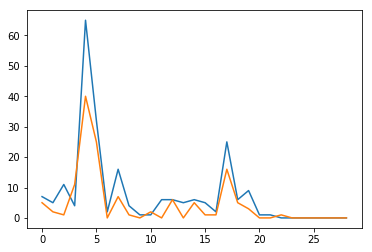

In [99]:
for country in ["美國","法國"]:
    plt.plot(df[country].values)

In [93]:
df = df.astype(int)

In [95]:
v=df.corr()


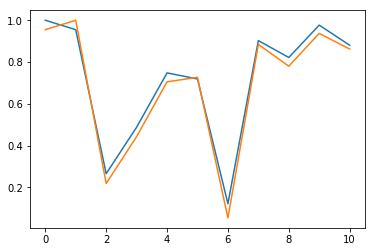

In [102]:
for country in ["美國","法國"]:
    plt.plot(v[country].values)

In [103]:
df2 = df.T

In [106]:
df2

,台北車站,士林夜市,西門町,永康商圈,東區,信義商圈,饒河夜市,捷運中山站商圈,師大商圈,五分埔商圈,...,雙城街夜市,北投商圈,文化大學,艋舺商圈,寧夏夜市,南機場,華西街,貓空商圈,延三夜市,陽明山
台北車站,1.000000,0.664374,0.909019,0.675662,0.828379,0.795774,0.859072,0.689088,0.371396,-0.100264,...,0.903813,0.594271,0.586412,0.762315,0.439548,0.651955,0.936422,0.712470,0.943190,0.944954
士林夜市,0.664374,1.000000,0.732520,0.613256,0.686200,0.697231,0.686476,0.575963,0.636419,0.359147,...,0.559673,0.395062,0.521515,0.574031,0.587803,0.481218,0.523597,0.325222,0.436331,0.437042
西門町,0.909019,0.732520,1.000000,0.501619,0.917040,0.844102,0.946286,0.607823,0.371692,-0.037071,...,0.915823,0.484311,0.787193,0.535168,0.243248,0.518385,0.800021,0.570312,0.808738,0.809277
永康商圈,0.675662,0.613256,0.501619,1.000000,0.673564,0.771663,0.428062,0.516477,0.372575,-0.003929,...,0.581160,0.371288,0.275753,0.809390,0.358266,0.408765,0.540979,0.432871,0.509157,0.511267
東區,0.828379,0.686200,0.917040,0.673564,1.000000,0.977502,0.830368,0.565111,0.269130,-0.034765,...,0.912750,0.405502,0.786771,0.510409,0.078181,0.409545,0.630210,0.477421,0.663096,0.663773
信義商圈,0.795774,0.697231,0.844102,0.771663,0.977502,1.000000,0.740816,0.631600,0.247700,0.004978,...,0.874791,0.457459,0.696133,0.584499,0.115106,0.450803,0.581083,0.434115,0.611548,0.612024
饒河夜市,0.859072,0.686476,0.946286,0.428062,0.830368,0.740816,1.000000,0.614208,0.347935,0.066044,...,0.773361,0.446771,0.742775,0.510551,0.272502,0.606279,0.770913,0.527698,0.786646,0.786521
捷運中山站商圈,0.689088,0.575963,0.607823,0.516477,0.565111,0.631600,0.614208,1.000000,0.172099,0.285138,...,0.573016,0.866663,0.329855,0.706163,0.495709,0.945328,0.595408,0.414013,0.634307,0.633931
師大商圈,0.371396,0.636419,0.371692,0.372575,0.269130,0.247700,0.347935,0.172099,1.000000,0.481847,...,0.266441,0.353354,0.505329,0.256715,0.638407,0.202548,0.299204,0.630256,0.195133,0.207085
五分埔商圈,-0.100264,0.359147,-0.037071,-0.003929,-0.034765,0.004978,0.066044,0.285138,0.481847,1.000000,...,-0.185443,0.341463,0.265627,-0.173259,0.556009,0.370055,-0.301258,0.165647,-0.296319,-0.287527


In [104]:
df2 = df2.corr()

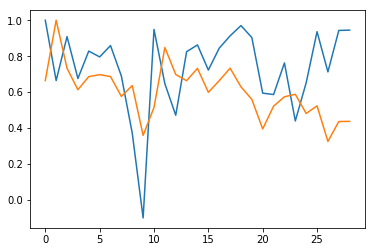

In [109]:
for country in ["台北車站","士林夜市"]:
    plt.plot(df2[country].values)